In [1]:
from PIL import Image

In [10]:
import numpy as np
import cv2

In [153]:
img1 = cv2.imread("003Character/m654_0.jpg").astype(np.int32)
img1 = img1 + np.ones_like(img1)*(100*np.random.random([3]))

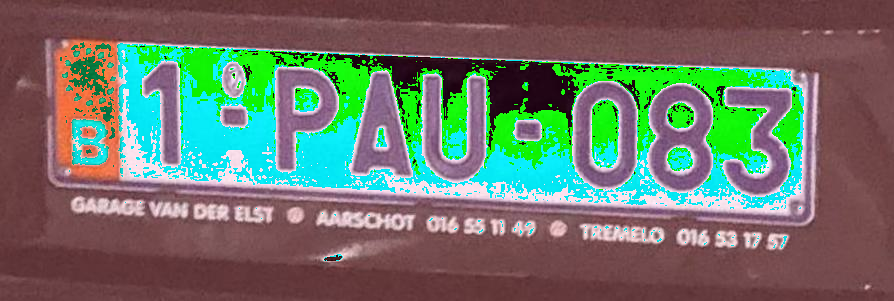

In [154]:
Image.fromarray(img1.astype('uint8'))

In [158]:
import glob
import os
len(os.listdir("003Character"))[400]

455

In [164]:
for file in os.listdir("003Character"):
    img0 = cv2.imread("003Character/"+file).astype(np.int32)
    img1 = img0 + np.ones_like(img0)*(100*np.random.random([3]))
    img2 = img0 + np.ones_like(img0)*(100*np.random.random([3]))
    img3 = img0 + np.ones_like(img0)*(100*np.random.random([3]))
    img4 = img0 + np.ones_like(img0)*(100*np.random.random([3]))
    cv2.imwrite("character_Data/"+file[:-4]+"_0.jpg",img0.astype("uint8"))
    cv2.imwrite("character_Data/"+file[:-4]+"_1.jpg",img1.astype("uint8"))
    cv2.imwrite("character_Data/"+file[:-4]+"_2.jpg",img2.astype("uint8"))
    cv2.imwrite("character_Data/"+file[:-4]+"_3.jpg",img3.astype("uint8"))
    cv2.imwrite("character_Data/"+file[:-4]+"_4.jpg",img4.astype("uint8"))

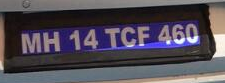

In [47]:
f = open("data/labels/train/car_50.txt","r+")
_, xmin, ymin, w, h =[float(ele) for ele in f.readline().split()]
img_temp = cv2.imread("data/images/train/car_50.jpeg")
xmin-=w/2
ymin-=h/2
xmax = xmin+w
ymax = ymin+h
xmin*=img_temp.shape[1]
xmax*=img_temp.shape[1]
ymin*=img_temp.shape[0]
ymax*=img_temp.shape[0]
img_temp = img_temp[int(ymin):int(ymax),int(xmin):int(xmax),:]
cv2.imwrite("sample_plates/plate_5.jpg",img_temp)
Image.fromarray(img_temp)

In [48]:
import xml.dom.minidom as xmld
def xml2txt(file):
    doc = xmld.parse("inference/003Character/"+file)
    n = len(doc.getElementsByTagName("object"))
    wid = float(doc.getElementsByTagName("width")[0].firstChild.nodeValue)
    hei = float(doc.getElementsByTagName("height")[0].firstChild.nodeValue)
    xmins = [float(ele.firstChild.nodeValue) for ele in doc.getElementsByTagName("xmin")]
    xmaxs = [float(ele.firstChild.nodeValue) for ele in doc.getElementsByTagName("xmax")]
    ymins = [float(ele.firstChild.nodeValue) for ele in doc.getElementsByTagName("ymin")]
    ymaxs = [float(ele.firstChild.nodeValue) for ele in doc.getElementsByTagName("ymax")]
    ws = [(xmax-xmin)/wid for xmin, xmax in zip(xmins, xmaxs)]
    hs = [(ymax-ymin)/hei for ymin, ymax in zip(ymins, ymaxs)]
    xcs = [(xmax+xmin)/(2*wid) for xmin, xmax in zip(xmins, xmaxs)]
    ycs = [(ymax+ymin)/(2*hei) for ymin, ymax in zip(ymins, ymaxs)]
    for i in range(5):
        f = open("character_labels/"+file[:-4]+"_"+str(i)+".txt","w+")
        for x,y,w,h in zip(xcs, ycs, ws, hs):
            f.write(" ".join(["0", str(x), str(y), str(w), str(h)]))
            f.write("\n")
        f.close()
    return ws, hs, xcs, ycs

In [209]:
doc.getElementsByTagName("xmin")[0].firstChild.nodeValue

'126'

In [212]:
for file in os.listdir("inference/003Character"):
    xml2txt(file)
    #print(file)

In [217]:
for file in os.listdir("character_Data"):
    if not os.path.isfile("character_labels/"+file[:-3]+"txt"):
        os.remove("character_Data/"+file)

In [230]:
all_data = os.listdir("character_Data")
train = all_data[:2005]
val = all_data[2005:]

In [231]:
for file in train:
    os.rename("character_Data/"+file,"character_Data/train/"+file)
    os.rename("character_labels/"+file[:-3]+"txt","character_labels/train/"+file[:-3]+"txt")
for file in val:
    os.rename("character_Data/"+file,"character_Data/valid/"+file)
    os.rename("character_labels/"+file[:-3]+"txt","character_labels/valid/"+file[:-3]+"txt")

In [18]:
from PIL import Image
import cv2
import numpy as np

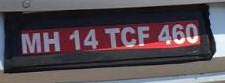

In [38]:
Image.open("sample_plates/plate_5.jpg")

In [39]:
img = cv2.imread("sample_plates/plate_5.jpg")

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_inv = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,39,1)

edges = auto_canny(thresh_inv)
ctrs, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
img_area = img.shape[0]*img.shape[1]
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi_area = w*h
    roi_ratio = roi_area/img_area
    if((roi_ratio >= 0.015) and (roi_ratio < 0.09)):
        if ((h>1.2*w) and (3*w>=h)):
            cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)

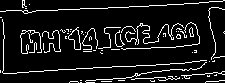

In [43]:
Image.fromarray(edges)  

In [32]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged

In [63]:
def xml2chr(file):
    doc = xmld.parse("inference/003Character/"+file)
    name = [ele.firstChild.nodeValue for ele in doc.getElementsByTagName("name")]
    wid = float(doc.getElementsByTagName("width")[0].firstChild.nodeValue)
    hei = float(doc.getElementsByTagName("height")[0].firstChild.nodeValue)
    xmins = [int(ele.firstChild.nodeValue) for ele in doc.getElementsByTagName("xmin")]
    xmaxs = [int(ele.firstChild.nodeValue) for ele in doc.getElementsByTagName("xmax")]
    ymins = [int(ele.firstChild.nodeValue) for ele in doc.getElementsByTagName("ymin")]
    ymaxs = [int(ele.firstChild.nodeValue) for ele in doc.getElementsByTagName("ymax")]
    
    for i in range(5):
        img = cv2.imread("character_Data.bak/"+file[:-4]+"_"+str(i)+".jpg")
        for ids, x,y,xm,ym in zip(name, xmins, ymins, xmaxs, ymaxs):
            img_temp = img[y:ym,x:xm]
            
            cv2.imwrite("char_recog_data/"+str(ids).upper()+"/"+file[:-4]+"_"+str(i)+".jpg",img_temp)
        
    return name

In [64]:
for file in os.listdir("inference/003Character"):
    xml2chr(file)

In [51]:
import os